# Data Preperation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('data/Sleep_Efficiency.csv')

# Rename all columns to lower case and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Drop "id", "wakeup_time", "bedtime"
data = data.drop(columns=["id", "wakeup_time", "bedtime"])

# Hot encoding for "Gender", "Smoking Status"
data = pd.get_dummies(data, columns=["gender", "smoking_status"], drop_first=True)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Data cleaning fill the missing values with the mean of the column
data = data.fillna(data.mean())

# Scale the data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Define the features (X) and target (y)
X = data.drop(columns=['sleep_efficiency'])
y = data['sleep_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data.head(n=15)

Mean Absolute Error: 0.28350184700750136
Mean Squared Error: 0.12977751134388688
R^2 Score: 0.8835152277094062


# Gradient Boosting

In [4]:

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae, '\nMSE:', mse, '\nR2:', r2)


MAE: 0.2838714647740873 
MSE: 0.1301748817517621 
R2: 0.8831585588151035


## Using GridSearchCV to Improve Model Performance

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4]
}

model_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
model_cv.fit(X_train, y_train)
y_pred = model_cv.predict(X_test)

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)

print('Best parameters:', model_cv.best_params_, '\nBest score:', model_cv.best_score_, '\nMAE:', mae, '\nMSE:', mse, '\nR2:', r2)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100} 
Best score: -0.151600608583156 
MAE: 0.28030746471348256 
MSE: 0.12633652726165892 
R2: 0.8866037616404643


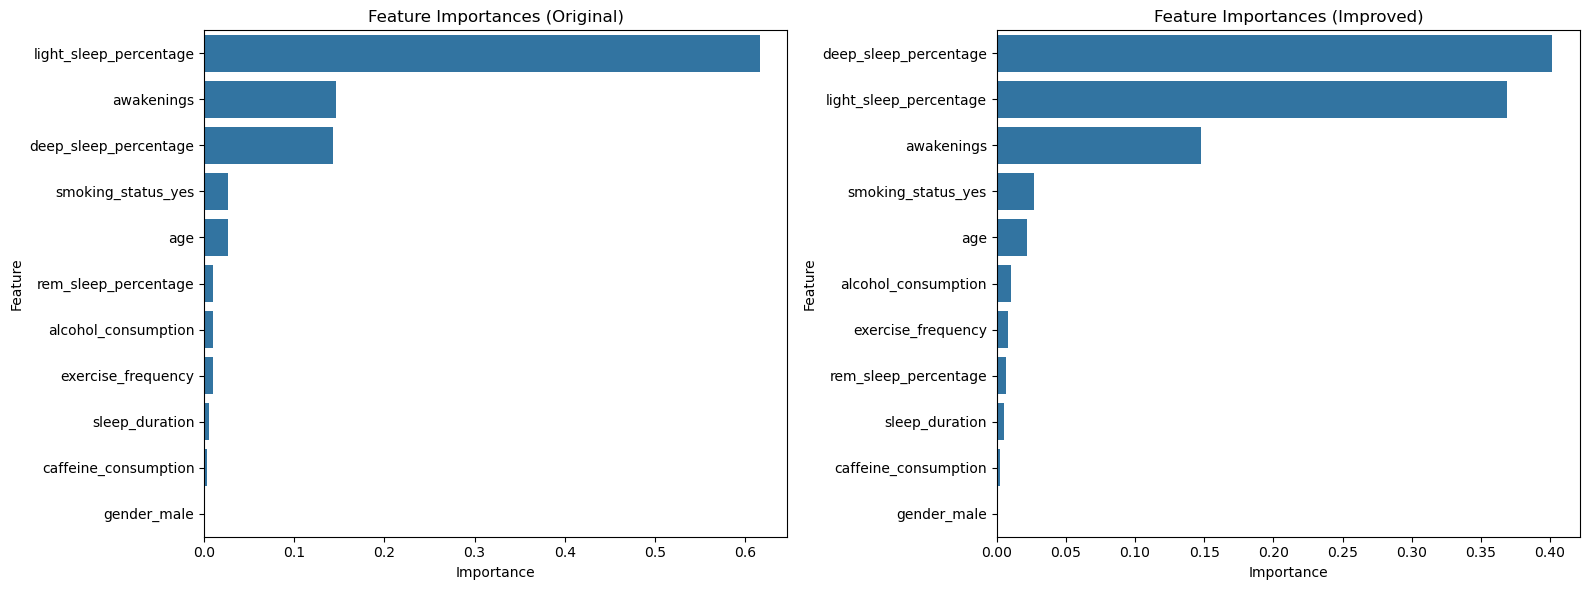

In [9]:
# Analyze the effect of caffeine_consumption
feature_importances_original = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances_improved = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_cv.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create subplots to display both bar plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the original model
sns.barplot(x='Importance', y='Feature', data=feature_importances_original, ax=axes[0])
axes[0].set_title('Feature Importances (Original)')

# Plot for the improved model
sns.barplot(x='Importance', y='Feature', data=feature_importances_improved, ax=axes[1])
axes[1].set_title('Feature Importances (Improved)')

plt.tight_layout()
plt.show()